In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Reemplaza 'ruta/a/tu/archivo.csv' con la ruta a tu archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/articulos_filtrados_ordenados.csv'

try:
    df = pd.read_csv(file_path)
    print("Archivo CSV cargado exitosamente:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")



Archivo CSV cargado exitosamente:


,titulo,url,fecha
0,The Persian Threat,http://www.wsj.com/articles/the-persian-threat...,2016-01-01
1,"Ten Years After Blowup, Amaranth Investors Wai...",http://www.wsj.com/articles/ten-years-after-bl...,2016-01-01
2,The NHL Scoring Title Remains Elusive for U.S....,http://www.wsj.com/articles/the-nhl-scoring-ti...,2016-01-01
3,What’s at Stake in NFL Week 17?,http://www.wsj.com/articles/whats-at-stake-in-...,2016-01-01
4,Happy New Regulatory Year,http://www.wsj.com/articles/happy-new-regulato...,2016-01-01


# Filtrado de noticias relevantes al oro
Identify and display articles relevant to gold prices from the `df` DataFrame by defining gold-related keywords, preprocessing the 'titulo' column, and filtering articles that contain these keywords.

En esta etapa identificamos articulos relevantes sobre los precios del oro desde el DataFrame `df` definiendo palabras clave relacionadas con el oro, preprocesando la columna 'titulo' y filtrando artículos que contengan estas palabras clave.

## Analisis breve de exploracion


Ensure the `df` DataFrame containing the article titles is loaded and ready for processing. This step confirms the data structure.

Nos aseguramos  de que el DataFrame `df` que contiene los títulos de los artículos esté cargado y listo para su procesamiento. Este paso confirma la estructura de los datos.


In [ ]:
print("Displaying the first 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Information (data types and non-null values):")
df.info()

print("\nDataFrame Shape (rows, columns):")
print(df.shape)

Displaying the first 5 rows of the DataFrame:


,titulo,url,fecha
0,The Persian Threat,http://www.wsj.com/articles/the-persian-threat...,2016-01-01
1,"Ten Years After Blowup, Amaranth Investors Wai...",http://www.wsj.com/articles/ten-years-after-bl...,2016-01-01
2,The NHL Scoring Title Remains Elusive for U.S....,http://www.wsj.com/articles/the-nhl-scoring-ti...,2016-01-01
3,What’s at Stake in NFL Week 17?,http://www.wsj.com/articles/whats-at-stake-in-...,2016-01-01
4,Happy New Regulatory Year,http://www.wsj.com/articles/happy-new-regulato...,2016-01-01



DataFrame Information (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188469 entries, 0 to 188468
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   titulo  188469 non-null  object
 1   url     188469 non-null  object
 2   fecha   188469 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB

DataFrame Shape (rows, columns):
(188469, 3)


## Definimos palabras clave asociadas al precio del oro


Establecemos una lista de palabras clave y frases que indiquen temas relacionados con el precio del oro ( «precio del oro», «oro», «metales preciosos», «inflación», «banco central»). Estas palabras clave se utilizarán para identificar artículos relevantes a partir de los títulos.



In [ ]:

gold_keywords = [
    'gold price',
    'gold prices',
    'precio oro',
    'precios oro',
    'oro',
    'precious metals',
    'metal precioso',
    'inflacion',
    'inflation',
    'central bank',
    'banco central',
    'bullion',
    'gold market',
    'mercado oro',
    'investment gold',
    'inversión oro',
    'safe haven',
    'refugio seguro',
    'commodity',
    'commodities',
    'patrón oro',
    'gold standard',
    'gold futures',
    'future gold',
    'oro fisico'
]

print("Defined Gold-related Keywords:")
print(gold_keywords)

Defined Gold-related Keywords:
['gold price', 'gold prices', 'precio oro', 'precios oro', 'oro', 'precious metals', 'metal precioso', 'inflacion', 'inflation', 'central bank', 'banco central', 'bullion', 'gold market', 'mercado oro', 'investment gold', 'inversión oro', 'safe haven', 'refugio seguro', 'commodity', 'commodities', 'patrón oro', 'gold standard', 'gold futures', 'future gold', 'oro fisico']


## Editamos los titulos de los artiuclos

Modificamos la columna 'título' convirtiendo todo el texto a minúsculas y eliminando la puntuación para estandarizar los títulos para una coincidencia precisa de palabras clave.

In [ ]:
import re


df['titulo_processed'] = df['titulo']


df['titulo_processed'] = df['titulo_processed'].str.lower()


df['titulo_processed'] = df['titulo_processed'].apply(lambda x: re.sub(r'[^À-῿Ⰰ-퟿豈-﷏ﷰ-￯\w\s]', '', x))

print("Displaying the first 5 rows with original and processed titles:")
display(df[['titulo', 'titulo_processed']].head())

Displaying the first 5 rows with original and processed titles:


,titulo,titulo_processed
0,The Persian Threat,the persian threat
1,"Ten Years After Blowup, Amaranth Investors Wai...",ten years after blowup amaranth investors wait...
2,The NHL Scoring Title Remains Elusive for U.S....,the nhl scoring title remains elusive for us p...
3,What’s at Stake in NFL Week 17?,whats at stake in nfl week 17
4,Happy New Regulatory Year,happy new regulatory year


## Identificamos articulos relevantes


Filter the DataFrame to select articles whose preprocessed titles contain any of the defined keywords or phrases, indicating their relevance to gold prices.

Filtramos el DataFrame para seleccionar artículos cuyos títulos  ​​contengan cualquiera de las palabras clave o frases definidas, indicando su relevancia para los precios del oro.


In [ ]:
import re


keywords_pattern = '|'.join(re.escape(keyword) for keyword in gold_keywords)


relevant_articles_mask = df['titulo_processed'].str.contains(keywords_pattern, case=False, na=False)


df_gold_articles = df[relevant_articles_mask].copy()

#
print(f"Number of articles relevant to gold prices: {len(df_gold_articles)}")


print("\nFirst 5 relevant articles:")
display(df_gold_articles.head())

Number of articles relevant to gold prices: 5464

First 5 relevant articles:


,titulo,url,fecha,titulo_processed
17,Minimum Wage Inflationary ‘Ripple Effect’,http://www.wsj.com/articles/minimum-wage-infla...,2016-01-01,minimum wage inflationary ripple effect
108,"Indonesia Meets Inflation Goal, Central Bank A...",http://www.wsj.com/articles/indonesia-meets-in...,2016-01-03,indonesia meets inflation goal central bank ac...
165,Time for a Rigorous National Debate About Surv...,http://www.wsj.com/articles/time-for-a-rigorou...,2016-01-03,time for a rigorous national debate about surv...
201,Soros Fund Management Taps Ted Burdick as Chie...,http://www.wsj.com/articles/soros-fund-managem...,2016-01-04,soros fund management taps ted burdick as chie...
255,Gold’s Safe Haven Appeal Increases Amid Saudi-...,http://www.wsj.com/articles/golds-safe-haven-a...,2016-01-04,golds safe haven appeal increases amid saudiir...


## Mostramos los articuulos relevantes


Presentamos los títulos y  otras columnas relevantes de los artículos identificados como relevantes para el precio del oro. Esto facilitará la revisión de los resultados del filtrado por palabras clave.


In [ ]:
print("Displaying the first 10 relevant articles with their titles, URLs, and dates:")
display(df_gold_articles[['titulo', 'url', 'fecha']].head(10))

print("Relevant articles displayed successfully.")

Displaying the first 10 relevant articles with their titles, URLs, and dates:


,titulo,url,fecha
17,Minimum Wage Inflationary ‘Ripple Effect’,http://www.wsj.com/articles/minimum-wage-infla...,2016-01-01
108,"Indonesia Meets Inflation Goal, Central Bank A...",http://www.wsj.com/articles/indonesia-meets-in...,2016-01-03
165,Time for a Rigorous National Debate About Surv...,http://www.wsj.com/articles/time-for-a-rigorou...,2016-01-03
201,Soros Fund Management Taps Ted Burdick as Chie...,http://www.wsj.com/articles/soros-fund-managem...,2016-01-04
255,Gold’s Safe Haven Appeal Increases Amid Saudi-...,http://www.wsj.com/articles/golds-safe-haven-a...,2016-01-04
261,Chances of Pick Up in December Eurozone Inflat...,http://www.wsj.com/articles/chances-of-pick-up...,2016-01-04
394,Gold Prices Edge Up,http://www.wsj.com/articles/gold-price-rises-a...,2016-01-05
408,Hilsenrath’s Take: Should The Fed Tolerate Inf...,http://www.wsj.com/articles/hilsenraths-take-s...,2016-01-05
416,Hilsenrath’s Take: Should The Fed Tolerate Inf...,http://www.wsj.com/articles/hilsenraths-take-s...,2016-01-05
421,China’s Central Bank Steps In to Prop Up Yuan,http://www.wsj.com/articles/chinas-central-ban...,2016-01-05


Relevant articles displayed successfully.


## Resumen:


* El conjunto de datos inicial, `df`, constaba de 188.469 artículos con columnas para `título`, `url` y `fecha`.
* Se definió  una lista de 25 palabras clave y frases relacionadas con el oro, que abarcaba términos tanto en inglés como en español (p. ej., 'precio del oro', 'inflación', 'banco central', 'refugio seguro').
* Los títulos de los artículos se preprocesaron convirtiéndolos a minúsculas y eliminando la puntuación, creando una columna `titulo_processed` estandarizada para una coincidencia precisa de palabras clave.
* Al comparar los títulos preprocesados ​​con las palabras clave definidas relacionadas con el oro, se identificaron 5.464 artículos relevantes para el precio del oro.


### Perspectivas o próximos pasos

* Si bien el filtrado por palabras clave es eficaz para las coincidencias directas, puede pasar por alto artículos que abordan implícitamente los precios del oro sin usar las palabras clave exactas. Para una búsqueda más exhaustiva, considere ampliar la lista de palabras clave o emplear métodos de análisis de texto más sofisticados.


# Analisis de sentimientos
Instalamos la biblioteca `transformers`, luego usamos un modelo de análisis de sentimientos en español previamente entrenado para predecir el sentimiento de la columna 'titulo' de `df_gold_articles`, categoricamos estos sentimientos en 'Positivo', 'Negativo' o 'Neutral' en una nueva columna DataFrame.


In [ ]:
print("Installing transformers and torch...")
!pip install transformers torch
print("Libraries installed successfully.")

print("Importing pipeline from transformers...")
from transformers import pipeline
print("pipeline imported successfully.")

Installing transformers and torch...
Libraries installed successfully.
Importing pipeline from transformers...
pipeline imported successfully.



Necesitamos cargar un modelo de análisis de sentimientos en español preentrenado mediante la secuencia de comandos "transformers". Esto implica especificar la tarea como "sentiment-analysis" y asignar el nombre del modelo "finiteautomata/beto-sentiment-analysis".




In [ ]:
print("Initializing sentiment analysis pipeline...")
sentiment_analyzer = pipeline('sentiment-analysis', model='finiteautomata/beto-sentiment-analysis')
print("Sentiment analysis pipeline initialized successfully with 'finiteautomata/beto-sentiment-analysis' model.")

Initializing sentiment analysis pipeline...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Sentiment analysis pipeline initialized successfully with 'finiteautomata/beto-sentiment-analysis' model.



El paso anterior inicializó correctamente el modelo de análisis de sentimientos. Ahora,  aplicamos este modelo a la columna "título" del DataFrame `df_gold_articles` para predecir el sentimiento de cada artículo. Almacenamos los resultados en una nueva columna y asignamos las etiquetas de salida del modelo a términos más descriptivos ("Positivo", "Negativo", "Neutral").


In [ ]:
print("Predicting sentiment for article titles...")


titles_to_analyze = df_gold_articles['titulo'].tolist()
sentiment_results = sentiment_analyzer(titles_to_analyze)


df_gold_articles['sentiment_label'] = [res['label'] for res in sentiment_results]
df_gold_articles['sentiment_score'] = [res['score'] for res in sentiment_results]

sentiment_mapping = {
    'NEG': 'Negativo',
    'NEU': 'Neutral',
    'POS': 'Positivo'
}
df_gold_articles['sentiment_category'] = df_gold_articles['sentiment_label'].map(sentiment_mapping)

print("Sentiment prediction complete.")
print("Displaying the first 5 articles with their predicted sentiments:")
display(df_gold_articles[['titulo', 'sentiment_category', 'sentiment_score']].head())

Predicting sentiment for article titles...
Sentiment prediction complete.
Displaying the first 5 articles with their predicted sentiments:


,titulo,sentiment_category,sentiment_score
17,Minimum Wage Inflationary ‘Ripple Effect’,Neutral,0.909121
108,"Indonesia Meets Inflation Goal, Central Bank A...",Neutral,0.996792
165,Time for a Rigorous National Debate About Surv...,Neutral,0.944746
201,Soros Fund Management Taps Ted Burdick as Chie...,Neutral,0.997055
255,Gold’s Safe Haven Appeal Increases Amid Saudi-...,Neutral,0.944734



Obtenemos la distribución de sentimientos en `df_gold_articles` calculando la cantidad y el porcentaje de artículos para cada categoría de sentimiento (Positivo, Negativo, Neutral),


In [ ]:
print("Calculating sentiment distribution...")


sentiment_counts = df_gold_articles['sentiment_category'].value_counts()


total_articles = len(df_gold_articles)


sentiment_percentages = (sentiment_counts / total_articles) * 100


sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage': sentiment_percentages
})


print("\nSentiment Distribution of Relevant Articles:")
display(sentiment_summary)


Calculating sentiment distribution...

Sentiment Distribution of Relevant Articles:


,Count,Percentage
sentiment_category,,
Neutral,4355,79.703514
Negativo,927,16.965593
Positivo,182,3.330893



 Ahora, visualizamos esta distribución utilizando un gráfico de barras para proporcionar una representación gráfica clara de las categorías de sentimiento.

Visualizing sentiment distribution...


/tmp/ipython-input-145190009.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_summary.index, y='Percentage', data=sentiment_summary, palette='viridis')


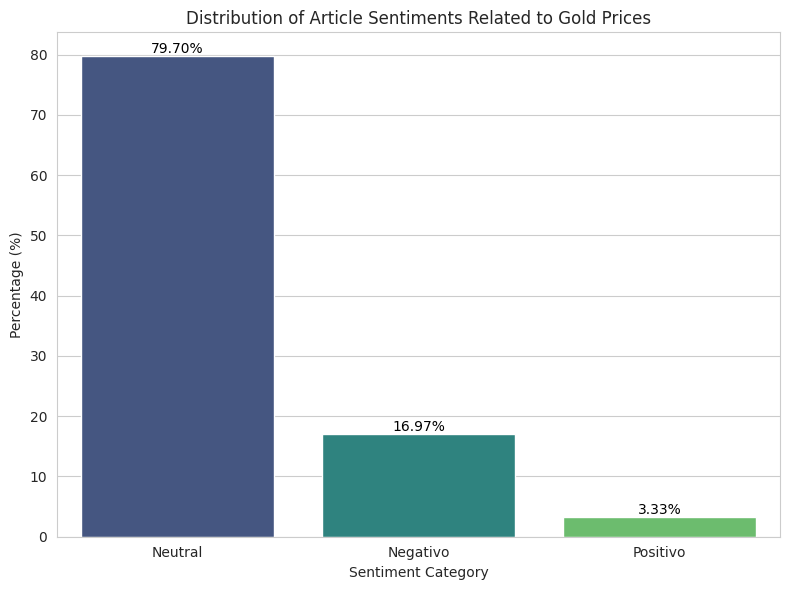

Sentiment distribution visualized.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing sentiment distribution...")


sns.set_style("whitegrid")


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_summary.index, y='Percentage', data=sentiment_summary, palette='viridis')


plt.xlabel('Sentiment Category')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Article Sentiments Related to Gold Prices')


for index, row in sentiment_summary.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.2f}%", color='black', ha="center")


plt.tight_layout()
plt.show()

print("Sentiment distribution visualized.")

Visualizing sentiment distribution...


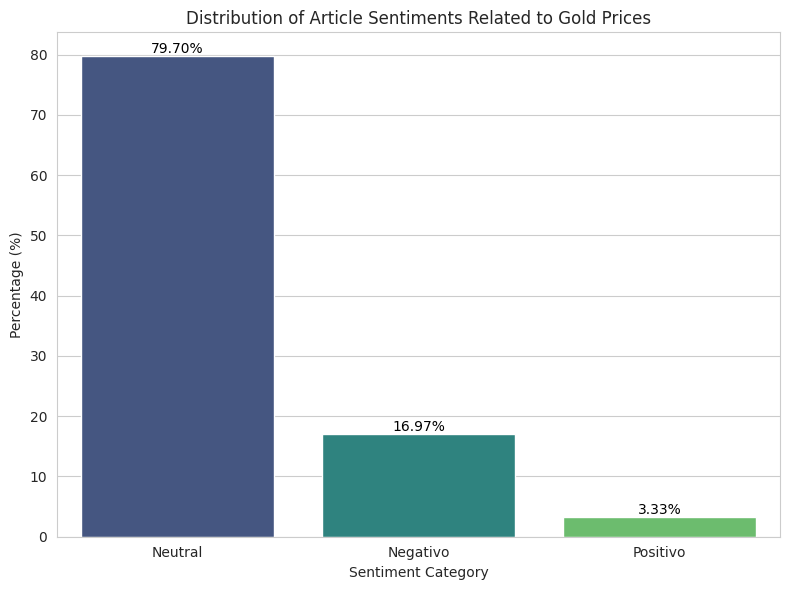

Sentiment distribution visualized.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing sentiment distribution...")

# Set a style for the plots
sns.set_style("whitegrid")

# Create the bar plot for sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_summary.index, y='Percentage', data=sentiment_summary, palette='viridis', hue=sentiment_summary.index, legend=False)

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Article Sentiments Related to Gold Prices')

# Annotate bars with their percentages
for index, row in sentiment_summary.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.2f}%", color='black', ha="center")

# Display the plot
plt.tight_layout()
plt.show()

print("Sentiment distribution visualized.")

Basado en el análisis de sentimiento de los artículos relacionados con el oro:

Sentimiento Neutral Dominante: Una mayoría significativa de los artículos  fueron clasificados como "Neutrales". Esto sugiere que la mayor parte de la cobertura noticiosa sobre los precios del oro tiende a ser factual, informativa o equilibrada, en lugar de expresar opiniones fuertemente positivas o negativas.

Sentimiento Negativo: Aproximadamente 16% de los artículos mostraron un sentimiento "Negativo". Esto podría indicar noticias relacionadas con posibles caídas en los precios del oro, incertidumbres económicas que afectan negativamente al oro u otras condiciones desfavorables del mercado.

Sentimiento Positivo: La proporción más pequeña de artículos, alrededor del 3 % , mostró un sentimiento "Positivo". Estos artículos podrían abordar el aumento de los precios del oro, el papel del oro como activo refugio durante crisis o pronósticos positivos del mercado.

Observaciones Clave:

La prevalencia del sentimiento neutral destaca que gran parte de las noticias financieras relacionadas con el oro buscan informar objetivamente sobre eventos y datos.

A pesar de que el oro suele considerarse un activo refugio, el sentimiento negativo aún constituye una porción notable, lo que sugiere perspectivas de mercado diversas o reacciones a distintos indicadores económicos.

El porcentaje relativamente bajo de artículos positivos implica que las noticias altamente optimistas sobre el oro podrían ser menos frecuentes o menos enfatizadas en el conjunto de datos analizado.

Esta distribución ofrece una visión general del tono predominante en las noticias sobre los precios del oro, con un claro énfasis en la información neutral.